# Dark matter shards of $\omega$ centauri
Taking the the velocities of the objects reported in https://arxiv.org/abs/1804.07050 and creating a composite velocity distribution from them

In [1]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#######

# v range
n = 100
v = linspace(0,850.0,n)

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta
v_lab = LabVelocitySimple(67,HaloModel)

# Load shards
dat = loadtxt('../shards.txt', delimiter=',', usecols=arange(0,10))
names = loadtxt('../shards.txt', delimiter=',', usecols=10,dtype='str')
velocities = dat[:,0:3]
dispersions = dat[:,6:9]
MAD = dat[:,3:6]
pops = dat[:,9]/sum(dat[:,9])

# Speed distributions
fv_Iso = SpeedDist_Isotropic(v,v_lab) # Round halo
fv_Saus = SpeedDist_Triaxial(v,v_lab) # Sausage

nshards = shape(dat)[0]
fv = zeros(shape=(nshards,n))
print 'Shards              velocities (vx,vy,vz) | dispersions (sig_x,sig_y,sig_z): | population'
for i in range(0,nshards):
    v_s = velocities[i,:]
    sig_s = dispersions[i,:]
    fv[i,:] = pops[i]*SpeedDist_3D(v,(v_lab-v_s),sig_s)
    sigr = sig_s[0]
    sigphi = sig_s[1]
    sigz = sig_s[2]
    beta = 1.0-(sigr**2.0+sigz**2.0)/(2*sigr**2.0)
    print '{:3d}{:9s}{:7s}{:7.2f}{:7.2f}{:7.2f}{:14s}{:7.2f}{:7.2f}{:7.2f}{:10s}{:3d}'.format(i+1,': '+names[i],'V_str = ',v_s[0],v_s[1],v_s[2],' |  sig_str = ',sig_s[0],sig_s[1],sig_s[2],' |  pop = ',int(pops[i]*sum(dat[:,9])))


Shards              velocities (vx,vy,vz) | dispersions (sig_x,sig_y,sig_z): | population
  1: S1     V_str =   -8.60-286.70 -67.90 |  sig_str =  115.30  49.90  60.00 |  pop =  34
  2: Rg1    V_str =   54.10-393.80  68.30 |  sig_str =  147.20  45.70 149.40 |  pop =  20
  3: Rg2    V_str =   47.80-254.60  71.80 |  sig_str =  110.20  27.80 172.10 |  pop =  20
  4: Rg3    V_str =   28.00-275.10  18.00 |  sig_str =  186.00  62.70 136.50 |  pop =  16
  5: Rg4    V_str =  177.60-287.90 117.90 |  sig_str =  114.60  46.00 162.70 |  pop =  13
  6: Rg5    V_str =  -10.00 -82.30  -0.60 |  sig_str =   83.20  21.20 162.70 |  pop =  29
  7: Rg6    V_str =  -11.90-222.10  88.00 |  sig_str =  187.60  44.00 134.90 |  pop =  30
  8: Rg7    V_str =  -92.30-160.20 -33.40 |  sig_str =  274.60  66.50 178.10 |  pop =  14
  9: S2     V_str =  -11.20 159.60-166.50 |  sig_str =   65.60  21.90 151.70 |  pop =  73
 10: C2     V_str = -242.40 109.90 180.70 |  sig_str =  229.20  35.90 236.10 |  pop =  22
 11: Cand8

## Speed distributions
Plot speed distributions of each shard individually and the population weighted composite distribution

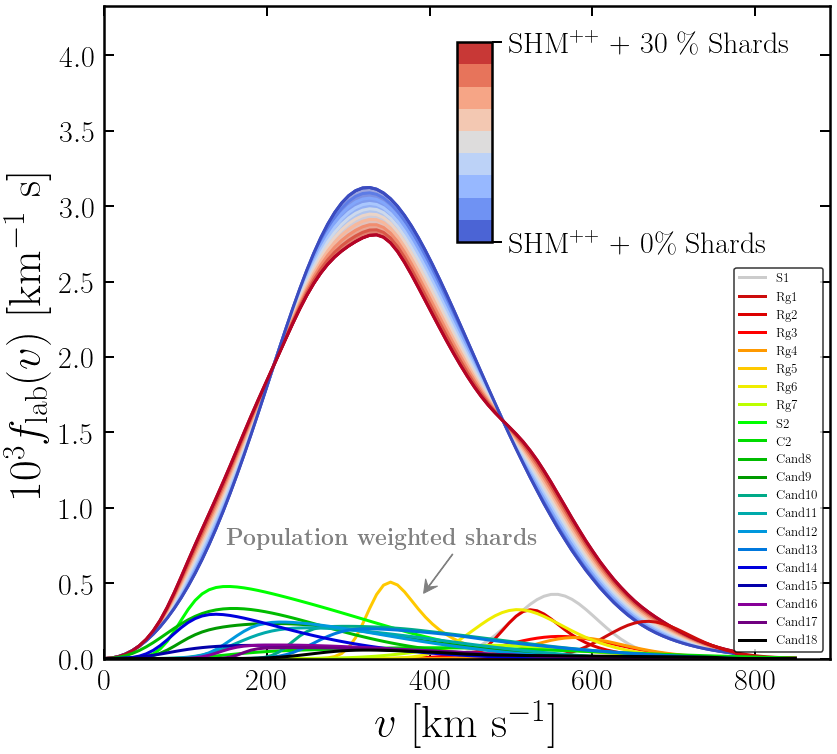

In [2]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_fv'

fv0 = (1-0.25)*fv_Iso + 0.25*fv_Saus

n_xi = 10
xi_vals = linspace(0,0.3,n_xi)
col = (cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm
y2 = 1e3*(xi_vals[-1]*sum(fv,0)+(1.0-xi_vals[-1])*fv0)
for i in range(0,n_xi):
    plt.fill_between(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(v,1e3*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),'-',color=col[i,:],linewidth=3)
    
cbar_max = r'SHM$^{++}$ + 30 \% Shards'
cbar_min = r'SHM$^{++}$ + 0\% Shards'
plt.plot(v,1e3*fv0,'-',color=col[0,:],linewidth=3)
plt.plot(v,y2,'-',color=col[-1,:],linewidth=3)

# Plot individual streams
colstrs = flipud(cm.nipy_spectral(linspace(0.0,1.0,nshards)))
for i in range(0,nshards):
    #plt.fill_between(v,1e3*fv[i,:],color=colstrs[i,:],linewidth=3,alpha=0.7,label=names[i])
    plt.plot(v,1e3*fv[i,:],color=colstrs[i,:],linewidth=3,label=names[i])
leg = plt.legend(loc='lower right',fontsize=13,edgecolor='k')
leg.get_frame().set_linewidth(1.5)
    
# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=max(1e3*fv_Iso)*1.5)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"$v$ [km s$^{-1}$]",fontsize=45);
plt.ylabel(r"$10^3 f_{\rm lab}(v)$ [km$^{-1}$ s]",fontsize=45);
plt.text(150,0.75,r'\bf {Population weighted shards}',fontsize=23,color='gray')
plt.arrow(0.48, 0.16, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='gray',facecolor='gray')

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

## Randomised speed distributions
Fluctuate the population in each stream by 20% to see how much the composite distribution is affected

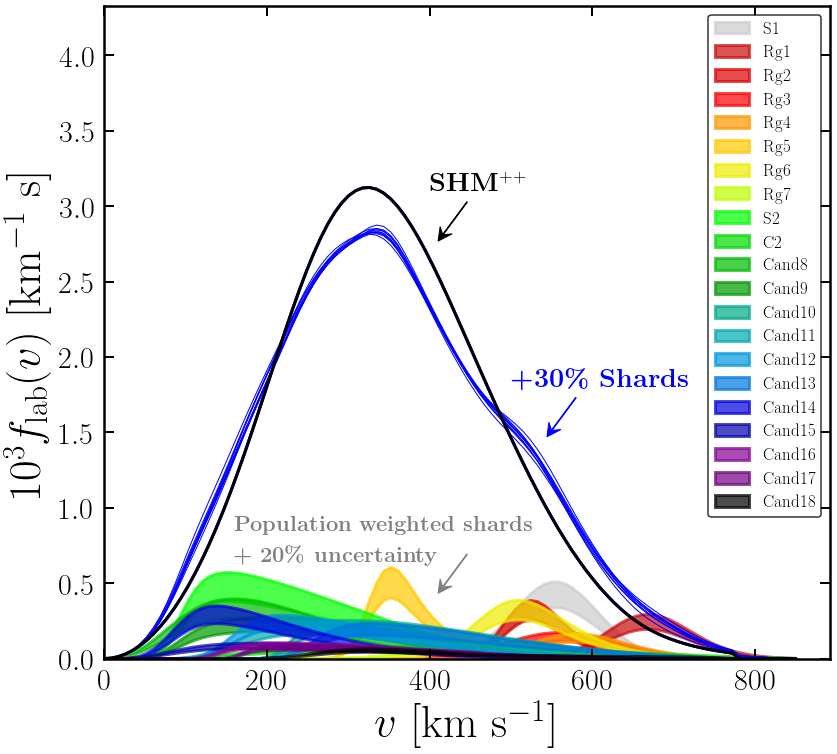

In [3]:
# Figure setup
from random import gauss
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_fv_random'

fv0 = (1-0.25)*fv_Iso + 0.25*fv_Saus

pop_sig = 0.2
xi_shards = 0.3
n_ex = 10
col = flipud(cm.jet(linspace(0,1,n_ex)))
for i in range(0,n_ex):
    fv_tot = zeros(shape=n)
    for j in range(0,nshards):
        npop = pops[j]*sum(dat[:,9])
        xi_rand = gauss(npop, pop_sig*npop)
        if xi_rand<0.0:
            xi_rand = 0.0
        fv_tot += xi_rand*fv[j,:]/pops[j]
    fv_tot /= trapz(fv_tot,v)
    plt.plot(v,1e3*(xi_shards*fv_tot+(1.0-xi_shards)*fv0),'-',color="blue",linewidth=1)
    
plt.plot(v,1e3*fv0,'-',color="blue",linewidth=3)
plt.plot(v,1e3*fv0,'k-',linewidth=3)

# Plot individual streams
for i in range(0,nshards):
    npop = pops[i]*sum(dat[:,9])
    y1 = 1e3*fv[i,:]*(1.0+pop_sig)
    y2 = 1e3*fv[i,:]*(1.0-pop_sig)
    plt.fill_between(v,y1,y2=y2,color=colstrs[i,:],linewidth=3,alpha=0.7,label=names[i])
leg = plt.legend(loc='upper right',fontsize=17,edgecolor='k')
leg.get_frame().set_linewidth(1.5)
     
# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=max(1e3*fv_Iso)*1.5)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"$v$ [km s$^{-1}$]",fontsize=45);
plt.ylabel(r"$10^3 f_{\rm lab}(v)$ [km$^{-1}$ s]",fontsize=45);

# text labels
plt.text(500,1.8,r'{\bf +30\% Shards}',fontsize=27,color='b')
plt.arrow(0.65, 0.4, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='b',facecolor='b')


plt.text(400,3.1,r'{\bf SHM}$^{++}$',fontsize=27,color='k')
plt.arrow(0.5, 0.7, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='k',facecolor='k')

plt.text(160,0.85,r'\bf {Population weighted shards}',fontsize=22,color='gray')
plt.text(160,0.65,r'\bf + 20\% uncertainty',fontsize=22,color='gray')
plt.arrow(0.5, 0.16, -0.04, -0.06, transform=ax.transAxes,length_includes_head=True,head_width=0.02, head_length=0.02, overhang=0.4,edgecolor='gray',facecolor='gray')



# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

# 2D velocity distribution
Display velocity distribution integrated over $v_z$

In [4]:
v_esc = 528.0
v_lab = array([11.1,220+12.24,7.25])
nn = 500
ni = 1000
fv2_Iso = zeros(shape=(nn,nn))
fv2_Saus = zeros(shape=(nn,nn))
vr = linspace(-600,600,nn)
vth = linspace(-800,200,nn)
v = zeros(shape=(ni,3))
vmax = v_esc + sqrt(sum(v_lab**2.0))

for i in range(0,nn):
    for j in range(0,nn):
        vzmax = vmax**2.0-vr[i]**2.0-vth[j]**2.0
        if vzmax>0.0:
            vzmax = sqrt(vzmax)
            vz = linspace(-vzmax,vzmax,ni)
            v[:,0] = vr[i]
            v[:,1] = vth[j]
            v[:,2] = vz
            fv2_Iso[i,j] = trapz(VelocityDist_Isotropic(v,v_lab),vz)
            fv2_Saus[i,j] = trapz(VelocityDist_Triaxial(v,v_lab),vz)
            
fv2_Shards = zeros(shape=(nn,nn,nshards))
for k in range(0,nshards):
    v_s = velocities[k,:]
    sig_s = dispersions[k,:]
    vmax = v_esc + sqrt(sum((v_lab-v_s)**2.0))
    for i in range(0,nn):
        for j in range(0,nn):
            vzmax = vmax**2.0-vr[i]**2.0-vth[j]**2.0
            if vzmax>0.0:
                vzmax = sqrt(vzmax)
                vz = linspace(-vzmax,vzmax,ni)
                v[:,0] = vr[i]
                v[:,1] = vth[j]
                v[:,2] = vz
                fv2_Shards[i,j,k] = pops[k]*trapz(VelocityDist_3D(v,v_lab-v_s,sig_s),vz)

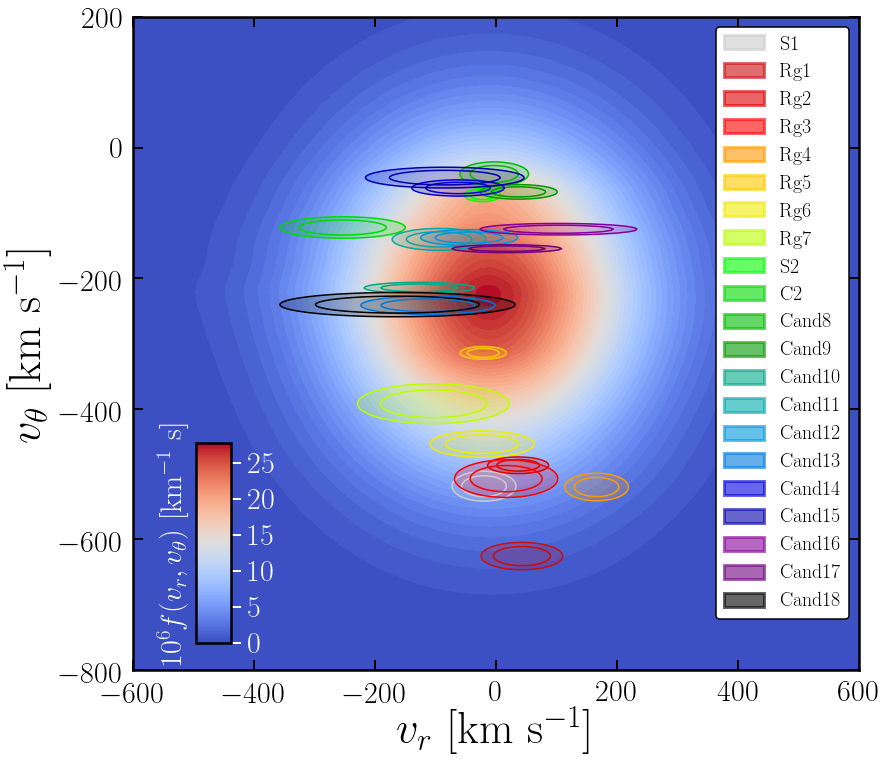

In [11]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_fv2'        
       
xi_aniso = 0.3
xi_iso = 1.0-xi_aniso
fv2_total = xi_iso*fv2_Iso + (xi_aniso/2.0)*(fv2_Saus+sum(fv2_Shards,2))
plt.contourf(vr,vth,transpose(fv2_total)*1e6,50,cmap=cm.coolwarm)

for i in range(0,nshards):
    f2 = transpose(fv2_Shards[:,:,i])
    plt.contourf(vr,vth,f2,levels=[amax(f2)*0.9,amax(f2)*0.95,amax(f2)],alpha=0.2,colors=((colstrs[i,:]),),linewidth=3)
    plt.contour(vr,vth,f2,levels=[amax(f2)*0.9,amax(f2)*0.95,amax(f2)],colors=((colstrs[i,:]),),linewidth=3)
    plt.fill_between([-10000,-10000],[0,1],linewidth=3,alpha=0.6,color=colstrs[i,:],label=names[i])
leg = plt.legend(loc='upper right',fontsize=20,edgecolor='k',framealpha=1.0)
leg.get_frame().set_linewidth(1.5)

vmin = amin(fv2_total)*1e6
vmax = amax(fv2_total)*1e6

# Plot fiddling
plt.xlim([-600,600])
plt.ylim([-800,200])
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xlabel(r"$v_r$ [km s$^{-1}$]",fontsize=45);
plt.ylabel(r"$v_\theta$ [km s$^{-1}$]",fontsize=45);

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-480, -60, 700, 400]) 
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes)
f = plt.gcf().get_children()
cbar = f[2]
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
cbar.set_ylabel(r'$10^6 f(v_r,v_\theta)$ [km$^{-1}$ s]')
cbar.yaxis.label.set_size(30)
cbar.yaxis.set_label_position("left")
cbar.yaxis.label.set_color('w')
cbar.xaxis.label.set_color('w')
cbar.tick_params(axis='x', colors='w')
cbar.tick_params(axis='y', colors='w')
cbar.spines['bottom'].set_color('w')
cbar.spines['top'].set_color('w') 
cbar.spines['right'].set_color('w')
cbar.spines['left'].set_color('w')

# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')



# Annual modulation
Plot range and amplitude of the annual modulation

In [12]:
# DM params
A = Xe131.MassNumber
m_chi = 20.0
sigma_p = 1.0e-45

# Energy range
n = 1000
E_th = 0.0001
E_max = 50.0
E = linspace(E_th,E_max,n)
v_min = MinimumWIMPSpeed(E,A,m_chi)

# Loop over times
ndays = 365
days = linspace(0,365,ndays)
dR0 = zeros(shape=(ndays,n))
dR = zeros(shape=(ndays,n))
R = zeros(shape=ndays)
R0 = zeros(shape=ndays)
for i in range(0,ndays):
    v_lab = LabVelocitySimple(days[i],HaloModel)
    gmin0 = gvmin_Isotropic(v_min,v_lab)
    gmin_sub = zeros(shape=shape(gmin0))
    for isub in range(0,nshards):
        v_spin = dat[isub,0:3]
        v0_str = sqrt(sum(dat[isub,6:9]**2.0))/(3.0*sqrt(2.0))
        gmin_sub += pops[isub]*gvmin_Isotropic(v_min,v_lab-v_spin,v0_str,v_esc)
        
    dR[i,:] = diffRecoilRate_SI(E,gmin_sub,A,sigma_p,m_chi,rho_0=0.55)
    dR0[i,:] = diffRecoilRate_SI(E,gmin0,A,sigma_p,m_chi,rho_0=0.55)
    R[i] = trapz(dR[i,(E>E_th)],E[E>E_th])
    R0[i] = trapz(dR0[i,(E>E_th)],E[E>E_th])

Rdiff = zeros(shape=n)
Rdiff0 = zeros(shape=n)
for i in range(0,n):
    Rdiff[i] = max(dR[:,i])-min(dR[:,i])
    Rdiff0[i] = max(dR0[:,i])-min(dR0[:,i])

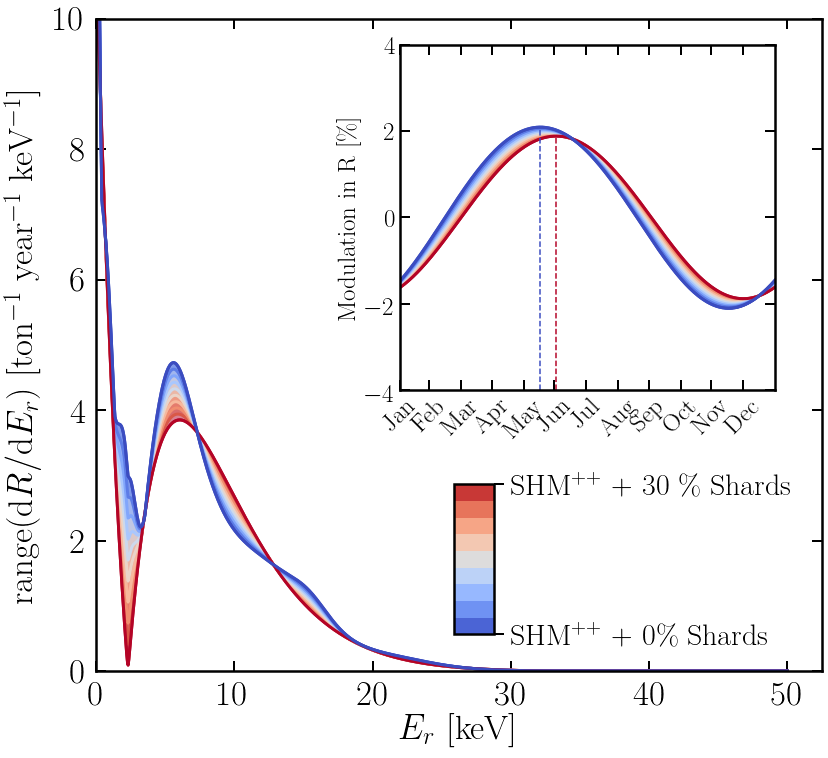

In [13]:
# Figure
pltname = 'Shards_annualmod'
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
left, bottom, width, height = [0.45, 0.45, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

col = flipud(cm.coolwarm(linspace(0,1,n_xi)))

# Main plot
plt.sca(ax1)
y2 = xi_vals[-1]*Rdiff+(1-xi_vals[-1])*Rdiff0
for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,'-',color=col[i,:],linewidth=3)
plt.plot(E,Rdiff0,label=cbar_max,linewidth=3,color=col[0,:])
plt.plot(E,y2,label=cbar_min,linewidth=3,color=col[-1,:])
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel(r"$E_r$ [keV]",fontsize=35);
plt.ylabel(r"range($\textrm{d}R/\textrm{d}E_r$) [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]" ,fontsize=35,labelpad=10);
ax1.set_xlim(left=0.0)
ax1.set_ylim(bottom=0.0,top=10.0)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

# Inset plot
plt.sca(ax2)
R0mid = (max(R0)+min(R0))/2.0
Rmid = (max(R)+min(R))/2.0
y2 = 100*xi_vals[-1]*(R-Rmid)/Rmid+100*(1.0-xi_vals[-1])*(R0-R0mid)/R0mid
for i in range(0,n_xi):
    dR = 100*xi_vals[i]*(R-Rmid)/Rmid+100*(1.0-xi_vals[i])*(R0-R0mid)/R0mid
    plt.fill_between(days,dR,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(days,dR,'-',color=col[i,:],linewidth=3)
plt.plot(days,100*(R0-R0mid)/R0mid,linewidth=3,color=col[0,:])
plt.plot(days,y2,linewidth=3,color=col[-1,:])
dR = 100*(R0-R0mid)/R0mid
plt.plot([days[argmax(dR)],days[argmax(dR)]],[-4.0,amax(dR)],'--',color=col[0,:])
plt.plot([days[argmax(y2)],days[argmax(y2)]],[-4.0,amax(y2)],'--',color=col[-1,:])

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax2.set_xlim(left=0.0,right=365)
ax2.set_ylim(bottom=-4.0,top=4.0)
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
plt.ylabel(r"Modulation in R [\%]" ,fontsize=25);
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax2, width="20%", height="30%", bbox_to_anchor=[320, -200, 200, 500]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

# Axion spectrum

In [18]:
import warnings
warnings.filterwarnings("ignore")

c_km = 3e8/1000

# Axion mass
m_a = 3e-6
m_a_s = m_a/6.58e-16

# Converting frequency to speed
n = 1000
vmin = 0.1
vmax = 800
omega_min = (m_a_s)*(1+(vmin/c_km)**2.0/2.0)
omega_max = (m_a_s)*(1+(vmax/c_km)**2.0/2.0)
axionBW = (omega_max-omega_min)
omega = linspace(omega_min-0.21*axionBW,omega_max+0.21*axionBW,n)
omega_min = omega[0]
omega_max = omega[-1]
domega = omega[1]-omega[0]
v = c_km*sqrt(2*(omega-m_a_s)/omega)
v[omega<=m_a_s] = 0.0
dv = (1.0/m_a_s)*(c_km/v)*c_km
dv[omega<=m_a_s] = 0.0

# Plot power spectra
v_lab = LabVelocitySimple(0.0,HaloModel)
fv_Iso = SpeedDist_Isotropic(v,v_lab)
fv_Saus = SpeedDist_Triaxial(v,v_lab)
fv0 = (1-0.25)*fv_Iso + 0.25*fv_Saus
fv = zeros(shape=(nshards,n))
for i in range(0,nshards):
    v_s = dat[i,0:3]
    sig_s = dat[i,6:9]
    fvsub = pops[i]*SpeedDist_3D(v,(v_lab-v_s),sig_s)
    fv[i,:] = fvsub
    print '{:3d}{:9s}{:7s}{:7.2f}{:7.2f}{:7.2f}{:14s}{:7.2f}{:7.2f}{:7.2f}{:10s}{:3d}'.format(i+1,': '+names[i],'V_str = ',v_s[0],v_s[1],v_s[2],' |  sig_str = ',sig_s[0],sig_s[1],sig_s[2],' |  pop = ',int(pops[i]*sum(dat[:,9])))


  1: S1     V_str =   -8.60-286.70 -67.90 |  sig_str =  115.30  49.90  60.00 |  pop =  34
  2: Rg1    V_str =   54.10-393.80  68.30 |  sig_str =  147.20  45.70 149.40 |  pop =  20
  3: Rg2    V_str =   47.80-254.60  71.80 |  sig_str =  110.20  27.80 172.10 |  pop =  20
  4: Rg3    V_str =   28.00-275.10  18.00 |  sig_str =  186.00  62.70 136.50 |  pop =  16
  5: Rg4    V_str =  177.60-287.90 117.90 |  sig_str =  114.60  46.00 162.70 |  pop =  13
  6: Rg5    V_str =  -10.00 -82.30  -0.60 |  sig_str =   83.20  21.20 162.70 |  pop =  29
  7: Rg6    V_str =  -11.90-222.10  88.00 |  sig_str =  187.60  44.00 134.90 |  pop =  30
  8: Rg7    V_str =  -92.30-160.20 -33.40 |  sig_str =  274.60  66.50 178.10 |  pop =  14
  9: S2     V_str =  -11.20 159.60-166.50 |  sig_str =   65.60  21.90 151.70 |  pop =  73
 10: C2     V_str = -242.40 109.90 180.70 |  sig_str =  229.20  35.90 236.10 |  pop =  22
 11: Cand8  V_str =    8.20 192.00 -25.00 |  sig_str =  124.00  40.20 186.60 |  pop =  49
 12: Cand9

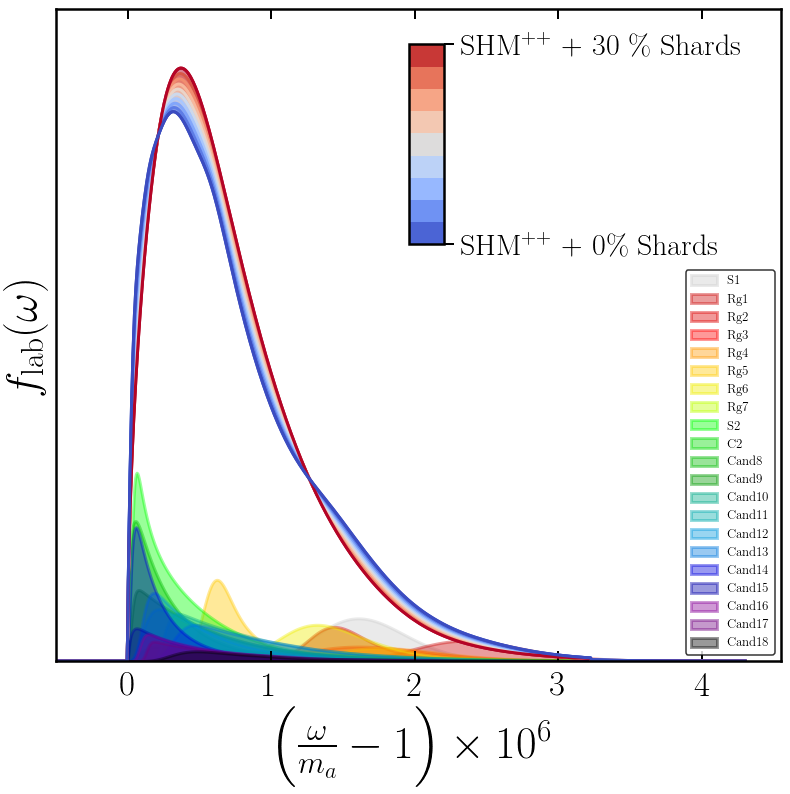

In [19]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_axionspectrum'

x = 1e6*(omega/m_a_s-1)
ys = domega*dv

y2 = ys*(xi_vals[-1]*sum(fv,0)+(1.0-xi_vals[-1])*fv0)
for i in range(0,n_xi):
    plt.fill_between(x,ys*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(x,ys*(xi_vals[i]*sum(fv,0)+(1.0-xi_vals[i])*fv0),'-',color=col[i,:],linewidth=3)
    
plt.plot(x,ys*fv0,'-',color=col[0,:],linewidth=3)
plt.plot(x,y2,'-',color=col[-1,:],linewidth=3)

# Plot individual streams
colstrs = flipud(cm.spectral(linspace(0,1,nshards)))
for i in range(0,nshards):
    plt.fill_between(x,ys*fv[i,:],linewidth=3,alpha=0.4,color=colstrs[i,:],label = names[i])
    
ax.set_xlim(left=-0.5)
ax.set_ylim(bottom=0.0,top=amax(fv0*ys)*1.1)
ax.tick_params(which='major',direction='in',width=2,length=10,left=False,top=True,pad=10,labelleft=False)
plt.xticks(fontsize=35)
plt.xlabel(r"$\left(\frac{\omega}{m_a} -1\right)\times 10^6$",fontsize=45);
plt.ylabel(r"$f_{\rm lab}(\omega)$",fontsize=45);
leg = plt.legend(loc='lower right',fontsize=13,edgecolor='k')
leg.get_frame().set_linewidth(1.5)

# Custom colorbar
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)

# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

# Directional signal

In [20]:
import warnings
warnings.filterwarnings("ignore", module="mpl_toolkits.basemap")
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(12,10))
pltname = 'Shards_Directional'

n = 200
ph = linspace(-pi, pi-2*pi/n, n)
th = linspace(0,pi, n/2)
PH,TH = meshgrid(ph,th)
X = cos(PH)*sin(TH)
Y = -sin(PH)*sin(TH)
Z = cos(TH)
ii = 0
q = zeros(shape=(n*n/2,3))
for i in range(0,n/2):
    for j in range(0,n):
        q[ii,:] = array([X[i,j],Y[i,j],Z[i,j]])
        ii = ii+1

# Benchmark
ne = 100
nbins = 3
E = zeros(shape=(nbins,ne))
E[0,:] = linspace(1.0,5.0,ne)
E[1,:] = linspace(5.0,10.0,ne)
E[2,:] = linspace(10.0,20.0,ne)

m_chi = 100.0
sigma_p = 1.0e-45
A = F19.MassNumber

# Radon transform and rate
dR0 = zeros(shape=(3,n*n/2))
dR = zeros(shape=(3,n*n/2))
fhat0 = zeros(shape=(n*n/2))
for ibin in range(0,nbins):
    E_r = E[ibin,:]
    v_min = MinimumWIMPSpeed(E_r,A,m_chi)
    for ie in range(0,ne):
        fhat0 = fhat_Isotropic(v_min[ie],-1.0*q,v_lab,v0,v_esc)
        dR0[ibin,:] += diffRecoilRate_SI(E_r[ie],fhat0,A,sigma_p,m_chi)

        fhat = zeros(shape=(n*n/2))
        for i in range(0,nshards):
            v_s = dat[i,0:3]
            sig_s = sqrt(sum(dat[i,6:9]**2.0))/3.0
            fhat += pops[i]*fhat_Isotropic(v_min[ie],-1.0*q,v_lab-v_s,sqrt(2.0)*sig_s,v_esc)
        dR[ibin,:] += diffRecoilRate_SI(E_r[ie],fhat,A,sigma_p,m_chi)
    print 'bin =',ibin

    

# Convert list into Mollweide map
dR_map0 = zeros(shape=(n/2,n,3))
dR_map = zeros(shape=(n/2,n,3))
for ibin in range(0,3):
    ii = 0
    for i in range(0,n/2):
        for j in range(0,n):
            dR_map0[i,j,ibin] = dR0[ibin,ii]
            dR_map[i,j,ibin] = dR[ibin,ii]
            ii = ii+1
    dR_map0[:,:,ibin] = flipud(dR_map0[:,:,ibin])     
    dR_map[:,:,ibin] = flipud(dR_map[:,:,ibin])        

bin = 0
bin = 1
bin = 2


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see

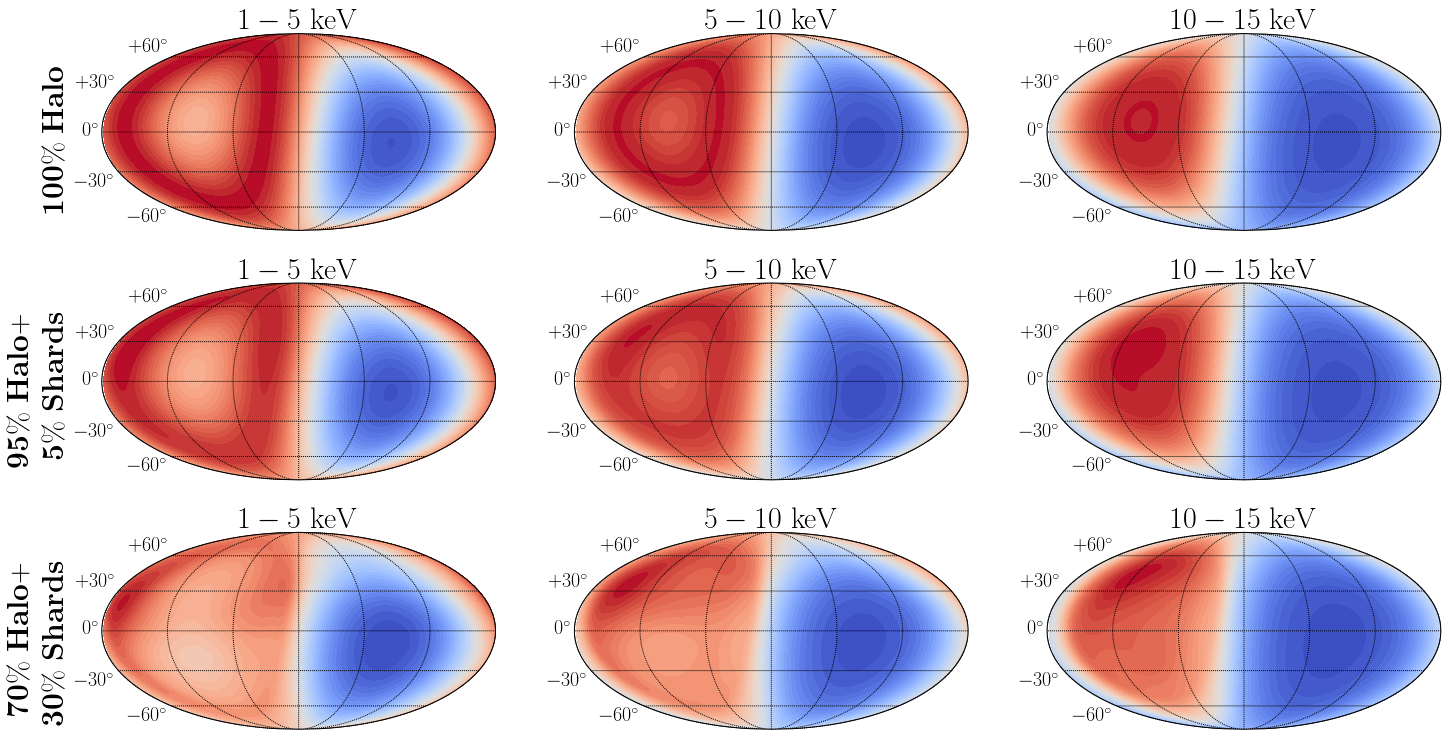

In [21]:
fig, axarr = plt.subplots(3, 3,figsize=(24,13))
warnings.filterwarnings("ignore")

tit = [r'$1 - 5$ keV',r'$5-10$ keV',r'$10-15$ keV']
for ibin in range(0,3): 
    plt.sca(axarr[0,ibin])
    m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)
    #for i in range(0,4): # loop is to cure some rendering issues with matplotlib
    m.contourf(PH*180/pi, TH*180/pi-90.0, dR_map0[:,:,ibin],50, cmap=cmap,latlon=True)
    m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=20) # draw parallels
    m.drawmeridians(arange(0.,420.,60.),color='k',fontsize=20) # draw meridians
    plt.title(tit[ibin],fontsize=30)

for ibin in range(0,3): 
    plt.sca(axarr[1,ibin])
    m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)
    #for i in range(0,4): # loop is to cure some rendering issues with matplotlib
    m.contourf(PH*180/pi, TH*180/pi-90.0, 0.95*dR_map0[:,:,ibin]+0.05*dR_map[:,:,ibin],50, cmap=cmap,latlon=True)
    m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=20) # draw parallels
    m.drawmeridians(arange(0.,420.,60.),color='k',fontsize=20) # draw meridians
    plt.title(tit[ibin],fontsize=30)

for ibin in range(0,3): 
    plt.sca(axarr[2,ibin])
    m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)
    #for i in range(0,4): # loop is to cure some rendering issues with matplotlib
    m.contourf(PH*180/pi, TH*180/pi-90.0, 0.7*dR_map0[:,:,ibin]+0.3*dR_map[:,:,ibin],50, cmap=cmap,latlon=True)
    m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=20) # draw parallels
    m.drawmeridians(arange(0.,420.,60.),color='k',fontsize=20) # draw meridians
    plt.title(tit[ibin],fontsize=30)

plt.sca(axarr[0,0])
plt.annotate(r'{\bf 100}\% {\bf Halo}', xy=(-0.15, 0.75), xycoords='axes fraction',fontsize=30,rotation=90)

plt.sca(axarr[1,0])
plt.annotate(r'{\bf 95}\% {\bf Halo}+', xy=(-0.24, 0.75), xycoords='axes fraction',fontsize=30,rotation=90)
plt.annotate(r'{\bf 5}\% {\bf Shards}', xy=(-0.15, 0.75), xycoords='axes fraction',fontsize=30,rotation=90)

plt.sca(axarr[2,0])
plt.annotate(r'{\bf 70}\% {\bf Halo}+', xy=(-0.24, 0.75), xycoords='axes fraction',fontsize=30,rotation=90)
plt.annotate(r'{\bf 30}\% {\bf Shards}', xy=(-0.15, 0.75), xycoords='axes fraction',fontsize=30,rotation=90)

#plt.tight_layout()
# colorbar
#cbar = plt.colorbar(orientation='horizontal',pad=0.02)
#cbar.ax.tick_params(labelsize=20,pad=10)
#cbar.set_label(r'$\frac{{\rm d}^2 R}{{\rm d}E_r {\rm d}\Omega_r}$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$ sr$^{-1}$]',fontsize=35,labelpad=10)
plt.show()

# save figure
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [22]:
from scipy.optimize import fmin

def qhat(x):
    qhat = zeros(shape=(1,3))
    qhat[0,0] = sqrt(1-x[0]**2.0)*cos(x[1])
    qhat[0,1] = sqrt(1-x[0]**2.0)*sin(x[1])
    qhat[0,2] = x[0]
    return qhat

x_lab = -1.0*v_lab/sqrt(sum(v_lab**2.0))

m_chi = 50.0
sigma_p = 1.0e-45
A = F19.MassNumber

ne = 100
Evals = linspace(0.1,100.0,ne)
xmin0 = zeros(shape=(ne,2))
xmin_in = array([-0.05,4.4])
dth0 = zeros(shape=(ne))
for i in range(0,ne):
    v_min = MinimumWIMPSpeed(Evals[i],A,m_chi)
    def fhat0(x):
        return -1.0*fhat_Isotropic(v_min,qhat(x),v_lab)
    if fhat0(xmin_in)==0.0:
        dth0[i] = 0.0
    else:
        res = fmin(fhat0,xmin_in,disp=False)
        xmin0[i,0] = res[0]
        xmin0[i,1] = res[1]
        xmin_in = xmin0[i,:]
        dth0[i] = 180/pi*arccos(sum(qhat(xmin_in)*x_lab))

xmin = zeros(shape=(ne,2,n_xi))
dth = zeros(shape=(ne,n_xi))
for j in range(0,n_xi):
    xi = xi_vals[j]
    for i in range(0,ne):
        v_min = MinimumWIMPSpeed(Evals[i],A,m_chi)
        def fhat(x):
            fhat = -1.0*(1-xi)*fhat_Isotropic(v_min,qhat(x),v_lab)
            for k in range(0,nshards):
                v_s = dat[k,0:3]
                sig_s = sqrt(sum(dat[k,6:9]**2.0))/3.0
                fhat += -1.0*xi*pops[k]*fhat_Isotropic(v_min,qhat(x),v_lab-v_s,sqrt(2.0)*sig_s,v_esc)
            return fhat
        if fhat(xmin_in)==0.0:
            dth[i,j] = 0.0
        else:
            res = fmin(fhat,xmin_in,disp=False)
            xmin[i,0,j] = res[0]
            xmin[i,1,j] = res[1]
            xmin_in = xmin[i,:,j]
            dth[i,j] = 180/pi*arccos(sum(qhat(xmin_in)*x_lab))

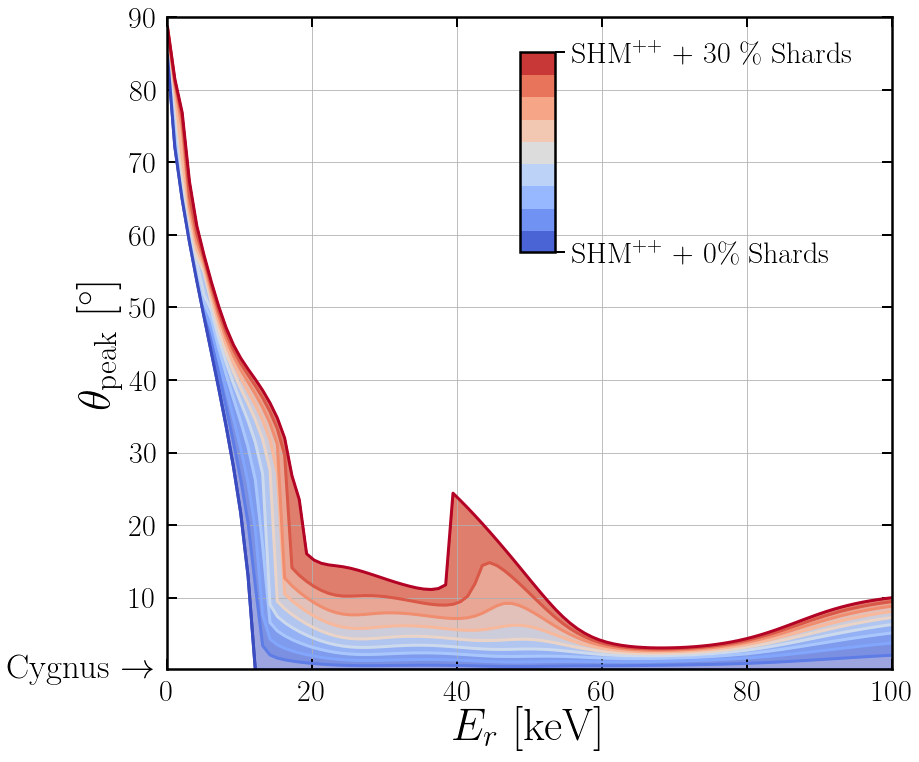

In [23]:
# Figure setup
from random import gauss
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_peakdirection'

col = (cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm
for j in range(0,n_xi):
    plt.fill_between(Evals,dth[:,j],y2=dth[:,-1],color=col[j,:],alpha=0.5)
    plt.plot(Evals,dth[:,j],color=col[j,:],linewidth=3)

plt.plot(Evals,dth0,linewidth=3,color=col[0,:])
plt.ylim([0.1,90])
plt.xlim([0,amax(Evals)])
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.ylabel(r"$\theta_{\rm peak}$ [$^\circ$]",fontsize=45);
plt.xlabel(r"$E_r$ [keV]",fontsize=45);
plt.text(-22,-1,r'Cygnus $\rightarrow$',fontsize=35)
plt.grid()

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

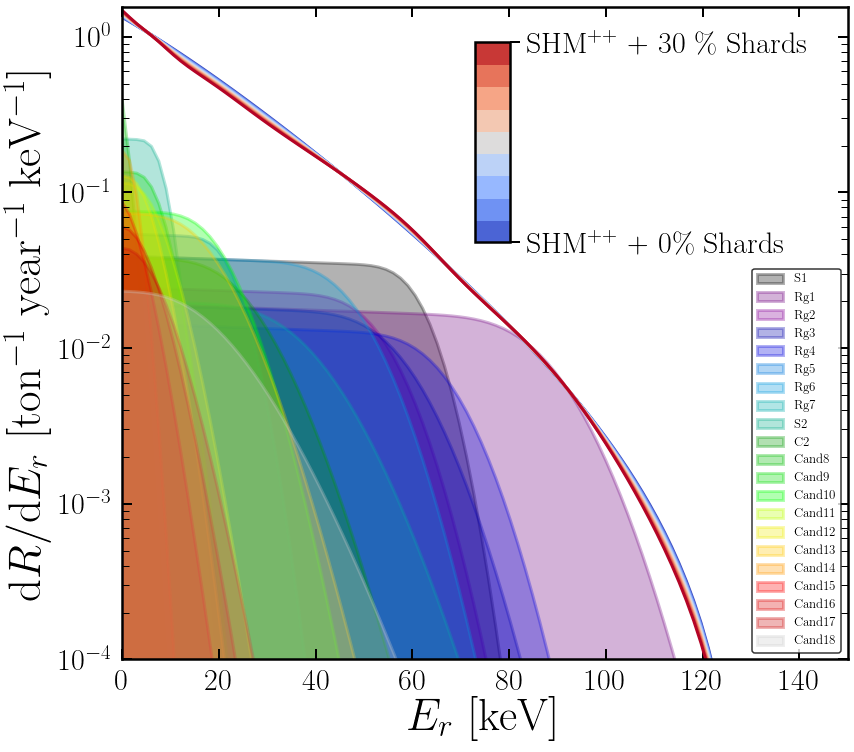

In [36]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'Shards_dRdE'

ne = 100
Evals = linspace(0.001,150.0,ne)

A = 19
m_chi = 50.0
sigma_p = 1.e-45

v_lab = LabVelocitySimple(67,HaloModel)
v_min = MinimumWIMPSpeed(Evals,A,m_chi)

# Halo
gmin0 = 1.0*gvmin_Isotropic(v_min,v_lab)
#gmin0 += 0.25*gvmin_Triaxial(v_min,v_lab)
dR0 = diffRecoilRate_SI(Evals,gmin0,A,sigma_p,m_chi,rho_0=0.55)

# Streams
dR = zeros(shape=(nshards,ne))
for isub in range(0,nshards):
    v_spin = dat[isub,0:3]
    v0_str = sqrt(sum(dat[isub,6:9]**2.0))/(3.0*sqrt(2.0))
    gmin_sub = pops[isub]*gvmin_Isotropic(v_min,v_lab-v_spin,v0_str,v_esc)
    dR[isub,:] =diffRecoilRate_SI(Evals,gmin_sub,A,sigma_p,m_chi,rho_0=0.55)

# Plot combined model
for j in range(0,n_xi):
    y = (1-xi_vals[j])*dR0+xi_vals[j]*sum(dR,0)
    plt.fill_between(Evals,y,y2=dR0,color=col[j,:])
    plt.plot(Evals,y,color=col[j,:],linewidth=3)

# Plot individual streams
colstrs = (cm.spectral(linspace(0,1,nshards)))
for i in range(0,nshards):
    plt.fill_between(Evals,dR[i,:],linewidth=3,color=colstrs[i,:],label = names[i],alpha=0.3)
    
# Style
ax.set_xlim(left=0.0,right=Evals[-1])
ax.set_ylim(bottom=1.0e-4)
plt.yscale('log')
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=30)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.ylabel(r'$\textrm{d}R/\textrm{d}E_r$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]',fontsize=45);
plt.xlabel(r"$E_r$ [keV]",fontsize=45);
leg = plt.legend(loc='lower right',fontsize=13,edgecolor='k')
leg.get_frame().set_linewidth(1.5)

# Custom colorbar
cbaxes = inset_axes(ax, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)

# Save figure
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [58]:
# Figure setup
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)
pltname = 'ShardsVelocityDist_Mollweide'

v_lab = array([0.0,0.0,0.0])

n = 200
ph = linspace(-pi, pi-2*pi/n, n)
th = linspace(0,pi, n/2)
PH,TH = meshgrid(ph,th)
X = cos(PH)*sin(TH)
Y = -sin(PH)*sin(TH)
Z = cos(TH)
ii = 0
q = zeros(shape=(n*n/2,3))
for i in range(0,n/2):
    for j in range(0,n):
        q[ii,:] = array([X[i,j],Y[i,j],Z[i,j]])
        ii = ii+1

fv3D = zeros(shape=n*n/2)
nv = 1000
v_vals = linspace(0,600,nv)
for i in range(0,1):
    v_s = velocities[i,:]
    sig_s = dispersions[i,:]/1.0
    for j in range(0,nv):
        fv3D += pops[i]*VelocityDist_3D(-1.0*v_vals[j]*q,-v_s,sig_s)
    print i

# Convert list into Mollweide map
fv_map = zeros(shape=(n/2,n))
ii = 0
for i in range(0,n/2):
    for j in range(0,n):
        fv_map[i,j] = fv3D[ii]
        ii = ii+1
fv_map[:,:] = flipud(fv_map[:,:])     
    
m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)
m.contourf(PH*180/pi, TH*180/pi-90.0, fv_map,
          levels=[amax(fv_map)*0.9,amax(fv_map)*0.95,amax(fv_map)],
          colors=((colstrs[0,:])),latlon=True,alpha=0.3)



m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=20) # draw parallels
m.drawmeridians(arange(0.,420.,60.),color='k',fontsize=20) # draw meridians

plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

0
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

ValueError: Invalid RGBA argument: 0.0

In [45]:
nn

500